# Tutorial I: Introduction to TensorFlow 2


<p>
Bern Winter School on Machine Learning, 2022<br>
Prepared by Mykhailo Vladymyrov.
</p>

This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

In this tutorial session we will get familiar wtih:
* How to do optimization in TF and what possibilities does that open to data science
* how to apply that to virtually any practical problem
   * unordered/tabular data
   * data with continuous dimensions
   * sequential data

The main feature of TF is the way we define operations.
In regular programming we define a set of functions or methods on the objects.
In TF we define a computational graph. Computational graph is a directed graph in which every node corresponds to an operation or variable. Variables can feed their value into operations, and operations can feed their output into other operations.
Then, during execution we feed some data and/or parameters as input of the graph, and the graph produces the output.

In this course we will not cover TF1 interface, but you're encouraged to check how the same things cab be implemented in TF1 on the github repo.

TF2 provides a high-level interface, allowing implementing 

While it is easy to use, some fundamental conceps can remain a bit obscured, but we will try to clarify that in the course.

## 00. Requirements

To run this notebooks you need Tensorflow and numpy installed.
As some parts of this tutorial rely on specific functions, it's strongly advised to use the Chrome browser or Chromium derivatives.

Basic knowledge of Python can be acquired [here](https://docs.python.org/3/tutorial/) and of Numpy [here](https://docs.scipy.org/doc/numpy/user/quickstart.html)

Full documentation on Tensorflow functions is available in the [reference](https://www.tensorflow.org/api_docs/python/). Sometimes [functions' implementation](https://github.com/tensorflow/tensorflow) might help to understand what is happening under the hood.


## 0. Cell execution

Press ``Ctrl+Enter`` or ``Shift+Enter`` on the next cell to execute the content

In [ ]:
print('It works')

It works


Navigate between cells with arrows. Press `Enter` to edit cell, `Esc` to exit. Press `A` or `B` too create a new cell above or below. In Colab these correspond to `Ctrl+M A` and `Ctrl+M B`

## 1. Load necessary libraries

In [ ]:
colab = True # set to True is using google colab

In [ ]:
if colab:
    %tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import os
import sys
import tarfile

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

%load_ext tensorboard

### Download libraries

In [ ]:
if colab:
    path = os.path.abspath('.')+'/material.tgz'
    url = 'https://github.com/neworldemancer/BMLWS/raw/main/tut_files/tpub0320.tgz'
    p = tf.keras.utils.get_file(path, url)
    assert p==path
    tar = tarfile.open(path, "r:gz")
    tar.extractall()
    tar.close()

81207979/81207979 [==============================] - 1s 0us/step


## 2. Create our first model

First we need to define the input for the model. We will create `Input`, where during the excecution we will feed in the input values.

In [ ]:
input = tf.keras.Input(shape=(), name = 'input', dtype=tf.float32)

In [ ]:
input

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'input')>

Then we will define two simple operations. In most cases simple Python notation gives the desired result.

In [ ]:
out1 = input + 5

In [ ]:
out2 = input * out1

This is the our model:

In [ ]:
model = tf.keras.Model(inputs=input, outputs=out1)

In [ ]:
model.compile()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None,)]                 0         
                                                                 
 tf.__operators__.add (TFOpL  (None,)                  0         
 ambda)                                                          
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


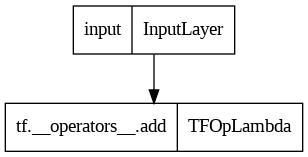

In [ ]:
tf.keras.utils.plot_model(model)

## 3. Run the model

In [ ]:
out1_res = model(1)
print(out1_res)

#out1 = input+5 = 1+5 = 6

tf.Tensor(6.0, shape=(), dtype=float32)


To obtain value of a tensor, we will call `.numpy()` on the tensor object:

In [ ]:
out1_val = out1_res.numpy()
print(out1_val)

6.0


Ususally we can just call the predict method:

In [ ]:
out1_val = model.predict([1])
print(out1_val)

1/1 [==============================] - 0s 236ms/step
[6.]


The result is an array of size one. The interface is designed such that predisctions for multiple inputs can be performed at once:

In [ ]:
out1_val = model.predict([1, 2, 4])
print(out1_val)

1/1 [==============================] - 0s 32ms/step
[6. 7. 9.]


Several values can be computed at the same time:

In [ ]:
model = tf.keras.Model(inputs=input, outputs=[out1, out2])

In [ ]:
out1_val, out2_val = model.predict([3])
print(out1_val)
print(out2_val)

#out1 = input+5 = 3+5 = 8
#out2 = (input+5)*input = (3+5)*3 = 8*3=24

1/1 [==============================] - 0s 54ms/step
[8.]
[24.]


## 4. Tensor operations

For ML tasks we often need to perform operations on high-dimensional data. Theese are represented as tensors in TF. For example we can calculate sum of squared values in an 1D array with 5 elements:

In [ ]:
input_arr = tf.keras.Input(name='input_arr', dtype=tf.float32, shape=(5,))
squared = input_arr ** 2  # elementwise operation
out_sum = tf.reduce_sum(squared)

model = tf.keras.Model(input_arr, out_sum)

In [ ]:
np_arr = np.asarray([[1,2,3,4,5]], dtype=np.float32)

sum_val = model.predict(np_arr)
print(sum_val)

# squared = (1,4,9,16,25)
# out_sum = 55

1/1 [==============================] - 0s 59ms/step
55.0


Or we can do the same for several 1D arrays at once:

In [ ]:
input_arr = tf.keras.Input(name='input_arr', dtype=tf.float32, shape=(None,)) #None stands for unknows length of the array (if youre not sure how your input will be like)
squared = tf.multiply(input_arr, input_arr)
out_sum = tf.reduce_sum(squared, axis=1) # sum only along 1st axis

model = tf.keras.Model(input_arr, out_sum)

#Sample arrays of different size along first axis. 
#They all can be fed into the input_arr placeholder since along first axis size is unconstrained

np_arr1 = np.asarray([[1,2,3,4,5]], dtype=np.float32)
np_arr2 = np.asarray([[1,2,3,4], [2,3,4,5]], dtype=np.float32)
np_arr3 = np.asarray([[1,2,3,4,5], [2,3,4,5,6], [25,65,12,12,11], [1,2,3,4,5], [2,3,4,5,6], [25,65,12,12,11]], dtype=np.float32)

print(model.predict(np_arr1))
print(model.predict(np_arr2))
print(model.predict(np_arr3))
    
    

1/1 [==============================] - 0s 34ms/step


[55.]
1/1 [==============================] - 0s 35ms/step
[30. 54.]
1/1 [==============================] - 0s 20ms/step
[  55.   90. 5259.   55.   90. 5259.]


## 5. Exercise 1

Hint: You can use question mark to get description of function right from Jupyter notebook:

In [ ]:
tf.reduce_sum?

or ``Shift+Tab`` within the brackets to see function parameters (just ``Space`` for google colab):

In [ ]:
tf.reduce_sum()

TypeError: ignored

Modify the code bellow to calculate mean of array's elements.

In [ ]:
tf.reduce_mean?

testwise npy array to check dimensions:

In [ ]:
x = np.array([[1, 2, 3], [4, 5, 6]], np.int32)
# The element of x in the *second* row, *third* column, namely, 6.
x[1, 2]

6

1/1 [==============================] - 0s 43ms/step
[[ 3.]
 [ 4.]
 [25.]]
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_arr (InputLayer)      [(None, None)]            0         
                                                                 
 tf.math.reduce_mean_9 (TFOp  (None, 1)                0         
 Lambda)                                                         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


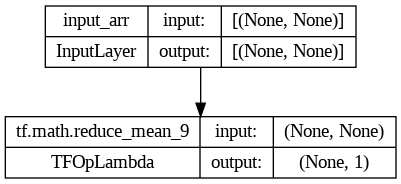

In [ ]:
input_arr = tf.keras.Input(name='input_arr', shape=(None,), dtype=tf.float32) #None stands for unknows length of the array
out_mean = tf.reduce_mean(input_arr, axis=1, keepdims = True) # 2.use reduce_mean to claculate mean along specified axes / axis 0 = sample axis (with axis 1 we take the mean of the columns for each sample)
# keepdims preserves the dimensions -> output remains 2-dimensional
np_arr = np.asarray([[1,2,3,4,5], [2,3,4,5,6], [25,65,12,12,11]], dtype=np.float32)

# 3. create model and run the prediction
model = tf.keras.Model(input_arr, out_mean)
res = model.predict(np_arr)
print(res)
    
#4. print model info & graph
model.compile()
model.summary()
tf.keras.utils.plot_model(model, show_shapes = True)


## 6. Optimization problem

In ML we always try to optimize model parameters to minimize a loss function. TF provides easy interface for solving optimization problems.

Let's see how this works. We will use a function $f$, parabolic with respect to the model parameter $t$: $f(x_0, x_1|t) = (x_0*t-x_1)^2$. Here $x_0$ and $x_1$ are given values for which we will try to minimize value of function $f$.

We will create a keras layer `F`, a class inherided from `tf.keras.layers.Layer`. It will have just three methods:
* `call` - main function, performing the actual computaion on the input
* `__init__` - constructer, called upon creation
* `build` - called when the model is is created

We define `t` as a variable using `add_weight` and initialize it with a constant 0. Variables are by default trainable, *i.e.* their value will be changed during training. 



In [ ]:
class F(tf.keras.layers.Layer):
  def __init__(self, **kwargs): # constructor, defined when a class is created
    super().__init__(**kwargs)

  def build(self, input_shape):
    self.t = self.add_weight(initializer=tf.keras.initializers.Constant(0),
                             name='t',
                             dtype=tf.float32)
    super().build(input_shape)

  def call(self, x): # array with rows and x0 and x1 columns
    x0 = x[..., 0] # references the element 0 at the last axis (column)
    x1 = x[..., 1]
    d = self.t * x0 - x1 # t is the trainable parameter
    f = d**2

    return f

For simplicity we will keep $x_0$ and $x_1$ in an array: `x` = [$x_0$, $x_1$]

In [ ]:
x = tf.keras.layers.Input(name='x', dtype=tf.float32, shape=(2,))

f_layer = F()
f = f_layer(x)

model = tf.keras.Model(inputs=x, outputs=f)

In [ ]:
def loss_f(true_y, y): #minimizes the y value (ignores true value)
  return y

Next we create an optimizer: object that on each iteration adjusts values of all trainable parameters (in our case just `t` to minimize the value of `f`. 
Here we will use plain steepest gradient descent.

We will minimize the value of the models output.

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01) # stochastic gradient descent
model.compile(optimizer=optimizer, loss=loss_f)

In [ ]:
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 x (InputLayer)              [(None, 2)]               0         
                                                                 
 f (F)                       (None,)                   1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.trainable_variables

[<tf.Variable 'f/t:0' shape=() dtype=float32, numpy=0.0>]

In [ ]:
t = model.trainable_variables[0]

In [ ]:
print(t)

<tf.Variable 'f/t:0' shape=() dtype=float32, numpy=0.0>


`t` - is a TF tensor. To get actual value of `t` we need to call `.numpy()` on it:

In [ ]:
print(t.numpy())

0.0


In [ ]:
model.predict(x=[[1., 3.]])  # (1 * 0 - 3)**2 == 9

1/1 [==============================] - 0s 86ms/step


array([9.], dtype=float32)

1/1 [==============================] - 0s 30ms/step


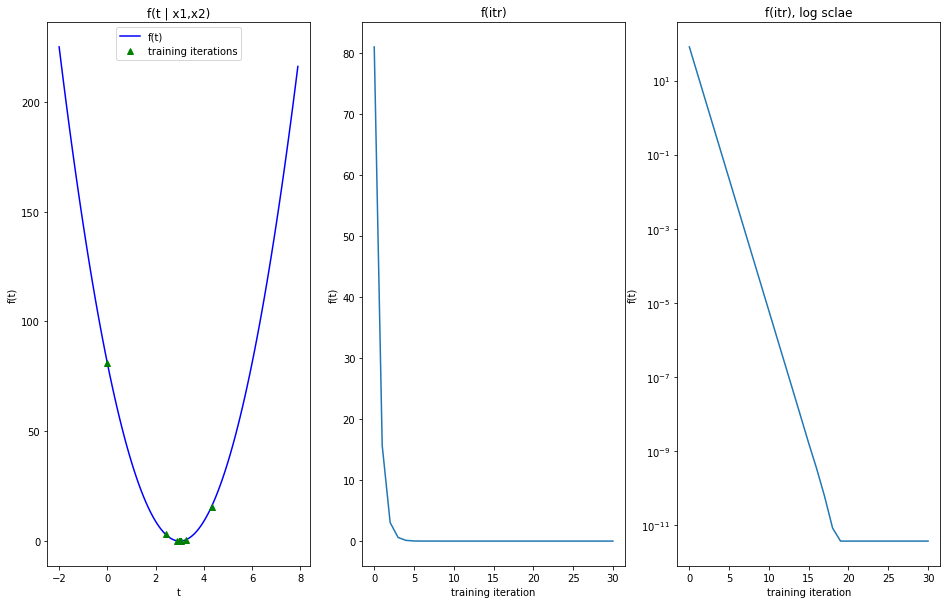

In [ ]:
# values of x1, x2 for which we will minimize f
x0_val = 3.
x1_val = 9.

t_val = 0.

# buffers to store intermidiate values of t and f to plot them later.
t_sv = []
f_sv = []

# reset the value of t to zero
t.assign(t_val)

f_val = model.predict([[x0_val, x1_val]])
t_val = t.numpy()
    
t_sv.append(t_val)
f_sv.append(f_val)
    
# optimization works iteratively, adjusting the value of t on each step
for itr in range (30): # fit 30 times
    model.fit(x=[[x0_val, x1_val]], y=[0], epochs=1)  # run one opdate iteration

    f_val = model.predict([[x0_val, x1_val]])
    t_val = model.trainable_variables[0].numpy()
    #save the current values of t and the function f
    t_sv.append(t_val)
    f_sv.append(f_val)
        


#just find the nice range for plotting
x0 = x1_val/x0_val
xhalf = max(abs(t_sv[0]-x0), 5.)
#fill array for parabola
t_all = np.arange(x0-xhalf, x0+xhalf, xhalf/50.)
f_all = np.asarray([(ti*x0_val-x1_val)*(ti*x0_val-x1_val) for ti in t_all])

#draw all
_, axs = plt.subplots(1, 3, figsize=(16,10))
axs[0].plot(t_all, f_all, 'b', t_sv, f_sv, 'g^')
axs[0].set_title('f(t | x1,x2)')
axs[0].set_xlabel('t')
axs[0].set_ylabel('f(t)')
axs[0].legend(('f(t)', 'training iterations'),  loc='upper center')
axs[1].plot(f_sv)
axs[1].set_title('f(itr)');
axs[1].set_ylabel('f(t)')
axs[1].set_xlabel('training iteration')
axs[2].semilogy(f_sv)
axs[2].set_title('f(itr), log sclae');
axs[2].set_ylabel('f(t)')
axs[2].set_xlabel('training iteration')
plt.show()

## 7. Exercise 2

Try to modify ``x0_val`` and ``x1_val`` in the above code, as well as the ``learning_rate`` and ``t`` initialization value, and see how it affects convergence. Get an intuition on simple example, it is very useful!

Try to see when 
1. convergence is too slow --> minimum not found if learning rate is too low / slow e.g. 0.001
2. oscillation near minimum occurs 
3. divergence --> getting bigger instead --> if learning rate ist too high e.g. 0.15
